#Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer
from sklearn.model_selection import train_test_split 

In [2]:
MY_PAST = 24
MY_SPLIT = 0.8
MY_HIDDEN = 500
MY_SHAPE = (MY_PAST, 1)
MY_EPOCH = 400

np.random.seed(3)

#data processing

In [3]:
raw = pd.read_csv('/content/drive/MyDrive/airline.csv', header = None, usecols = [1])
print('original data')
print(raw.head(15))
print(raw.describe())

original data
      1
0   112
1   118
2   132
3   129
4   121
5   135
6   148
7   148
8   136
9   119
10  104
11  118
12  115
13  126
14  141
                1
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


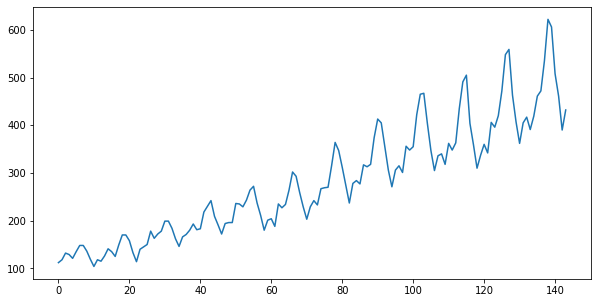

In [4]:
plt.figure(figsize=(10,5))
plt.plot(raw)

In [5]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

raw_DB = scaler.fit_transform(raw)
print('Nomalize data')
print('data type :', type(raw_DB))
print(raw_DB.flatten())

Nomalize data
data type : <class 'numpy.ndarray'>
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 

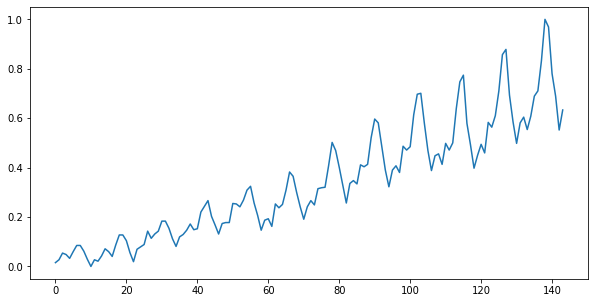

In [6]:
plt.figure(figsize=(10,5))
plt.plot(raw_DB)

In [7]:
#data split
data = []
for i in range(len(raw_DB) - MY_PAST):
  data.append(raw_DB[i:i+MY_PAST+1])

print('---data result---')
print('one data len :', len(data[0]))
print('all data size :', len(data))
print('first data : \n', data[0])

data = np.array(data)  #data type change list to numpy

---data result---
one data len : 25
all data size : 120
first data : 
 [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]]


In [8]:
#묶음들을 임의로 섞음
np.random.shuffle(data)
print('\n###분할 전 데이터 모양 :',data.shape)

#data split input and output
X_data = data[:,0:MY_PAST] #[:,:] 행렬 데이터분할 앞은 행 뒤는 열.
Y_data = data[:,-1]        #전채 행, 마지막 열
print(X_data.shape)
print(Y_data.shape)

#data split all codeing

split = int(data.shape[0]*MY_SPLIT)
X_train = X_data[:split]
X_test = X_data[split:]
Y_train = Y_data[: split]
Y_test = Y_data[split:]

print('학습용 입력 데이터',X_train.shape)
print('학습용 출력 데이터',Y_train.shape)
print('평가용 입력 데이터',X_test.shape)
print('평가용 출력 데이터',Y_test.shape)

#data split function
#X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = MY_SPLIT)
#print('학습용 입력 데이터',X_train.shape)
#print('학습용 출력 데이터',Y_train.shape)
#print('평가용 입력 데이터',X_test.shape)
#print('평가용 출력 데이터',Y_test.shape)


###분할 전 데이터 모양 : (120, 25, 1)
(120, 24, 1)
(120, 1)
학습용 입력 데이터 (96, 24, 1)
학습용 출력 데이터 (96, 1)
평가용 입력 데이터 (24, 24, 1)
평가용 출력 데이터 (24, 1)


#RNN MODULE

In [9]:
model = Sequential()
model.add(InputLayer(input_shape = MY_SHAPE))
model.add(LSTM(units=MY_HIDDEN, activation='relu', return_sequences=True))
model.add(LSTM(units=MY_HIDDEN, activation='relu', return_sequences=True))
model.add(LSTM(units=MY_HIDDEN))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 500)           1004000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 500)           2002000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dense (Dense)                (None, 250)               125250    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 5,196,251
Trainable params: 5,196,251
Non-trainable params: 0
______________________________________________

#RNN Training

In [10]:
model.compile(optimizer = 'adam', loss = 'mape')
begin = time()
model.fit(X_train, Y_train, epochs = MY_EPOCH, verbose=1)
end = time()
print('train time : {:.2f}sec'.format(end-begin))

Epoch 1/400
3/3 [==============================] - 5s 32ms/step - loss: 73.0228
Epoch 2/400
3/3 [==============================] - 0s 32ms/step - loss: 69.7526
Epoch 3/400
3/3 [==============================] - 0s 31ms/step - loss: 55.1781
Epoch 4/400
3/3 [==============================] - 0s 33ms/step - loss: 58.2372
Epoch 5/400
3/3 [==============================] - 0s 34ms/step - loss: 47.4086
Epoch 6/400
3/3 [==============================] - 0s 33ms/step - loss: 41.8557
Epoch 7/400
3/3 [==============================] - 0s 34ms/step - loss: 36.7565
Epoch 8/400
3/3 [==============================] - 0s 32ms/step - loss: 29.7750
Epoch 9/400
3/3 [==============================] - 0s 32ms/step - loss: 27.0070
Epoch 10/400
3/3 [==============================] - 0s 31ms/step - loss: 23.1536
Epoch 11/400
3/3 [==============================] - 0s 33ms/step - loss: 26.5940
Epoch 12/400
3/3 [==============================] - 0s 31ms/step - loss: 20.8825
Epoch 13/400
3/3 [===================

#RNN evaluate

In [11]:
score = model.evaluate(X_test,Y_test, verbose = 1)
print('loss : {:.2f}'.format(score))
#print('acc : ', score[1])  #숫자를 예측하는 문제라 정확도는 의미가 없음

1/1 [==============================] - 1s 604ms/step - loss: 6.8453
loss : 6.85


In [12]:
pred = model.predict(x = X_test)
pred = scaler.inverse_transform(pred)
tmp = np.squeeze(pred).astype(int)
print('RNN predict value :', tmp)

RNN predict value : [167 473 330 234 183 213 397 254 201 325 238 519 149 282 405 329 224 175
 147 308 311 164 194 345]


In [13]:
Y_test = scaler.inverse_transform(Y_test)
tmp = np.squeeze(Y_test).astype(int)
print('answer :', tmp)

answer : [172 491 347 236 193 227 359 259 209 360 235 535 146 264 405 356 242 191
 145 315 312 163 196 362]


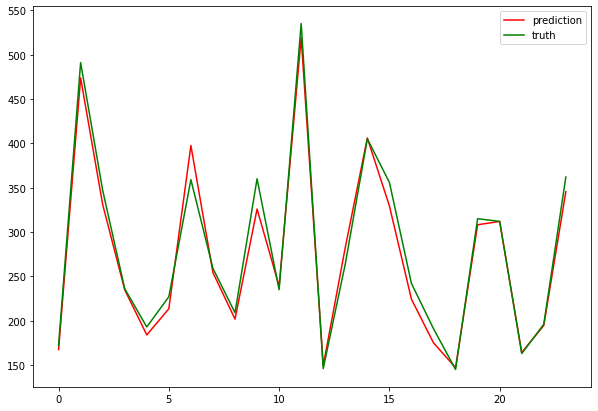

In [14]:
plt.figure(figsize=(10,7))
plt.plot(pred,'r')
plt.plot(Y_test,'g')
plt.legend(['prediction','truth'])
plt.show()